<center>
<h1> Credit Card Spend Prediction - Case Study
</center>

### In this module...

First, we'll load our analytical base table

Then, we'll go through the essential modeling steps:

1. [Split your dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics and select winner](#evaluate)

Finally, we'll save the best model as a project deliverable!

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [3]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Load the Dataset

In [6]:
cleaned_creditdata = pd.read_csv("cleaneddata_creditcard.csv")

In [7]:
cleaned_creditdata.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,...,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,ln_totalcreditspend
0,1.000,2.000,1.000,20.000,2.000,15.000,3.000,1.000,1.000,0.000,1.000,0.000,31.000,3.430,2.000,11.100,1.200,0.180,2.240,0.810,1.000,1.000,0.000,-1.000,-1.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1.000,2.000,1.000,0.000,14.300,1.000,0.000,0.000,8.000,4.000,22.000,0.000,1.000,...,1.870,34.400,3.540,1.000,29.000,161.050,1.000,29.500,126.100,1.000,14.250,60.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,13.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,0,0,1,5.014
1,5.000,5.000,0.000,22.000,2.000,17.000,4.000,2.000,0.000,0.000,1.000,0.000,15.000,2.710,1.000,18.600,1.220,0.200,1.570,0.450,1.000,1.000,0.000,-1.000,-1.000,2.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,1.000,3.000,2.000,1.000,2.000,1.000,1.000,6.800,1.000,0.000,0.000,1.000,1.000,29.000,1.000,0.000,...,2.190,330.600,5.800,0.000,0.000,0.000,1.000,54.850,1975.000,1.000,16.000,610.000,1.000,45.650,1683.550,1.000,1.000,1.000,4.000,1.000,0.000,1.000,0.000,1.000,1.000,18.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0,0,0,0,0,0,0,1,0,0,0,4.364
2,3.000,4.000,1.000,67.000,6.000,14.000,2.000,2.000,0.000,16.000,5.000,0.000,35.000,3.560,2.000,9.900,0.930,-0.070,2.540,0.930,0.000,4.000,1.000,13.000,2.000,3.000,3.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,30.000,5.000,3.000,1.000,1.000,18.800,1.000,0.000,1.000,4.000,3.000,24.000,1.000,0.000,...,3.350,1858.350,7.530,0.000,0.000,0.000,0.000,0.000,0.000,1.000,23.000,1410.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,21.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0,0,0,1,0,0,0,0,0,5.889
3,4.000,3.000,0.000,23.000,2.000,16.000,3.000,2.000,0.000,0.000,1.000,0.000,20.000,3.000,1.000,5.700,0.020,-3.780,1.120,0.110,1.000,2.000,1.000,18.000,4.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,3.000,2.000,3.000,1.000,1.000,8.700,1.000,0.000,1.000,1.000,1.000,38.000,1.000,0.000,...,1.790,199.450,5.300,0.000,0.000,0.000,0.000,0.000,0.000,1.000,21.000,685.000,0.000,0.000,0.000,1.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,1.000,1.000,26.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0,0,0,0,0,0,0,1,0,0,0,5.887
4,2.000,2.000,0.000,26.000,3.000,16.000,3.000,2.000,0.000,1.000,1.000,0.000,23.000,3.140,1.000,1.700,0.210,-1.540,0.180,-1.740,0.000,1.000,1.000,13.000,2.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,3.000,2.000,1.000,0.000,1.000,10.600,1.000,0.000,1.000,6.000,3.000,32.000,0.000,0.000,...,1.120,74.100,4.310,1.000,16.500,387.700,0.000,0.000,0.000,1.000,17.250,360.000,1.000,19.050,410.800,0.000,1.000,0.000,3.000,1.000,1.000,1.000,1.000,0.000,1.000,27.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,1,0,0,0,0,0,0,6.232


<br id="split">
# 1. Split your dataset

<br>
First, let's import the <code style="color:steelblue">train_test_split()</code> function from Scikit-Learn.

In [8]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

Next, separate your dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).

In [10]:
# Create separate object for target variable
y = cleaned_creditdata.ln_totalcreditspend
# Create separate object for input features
X = cleaned_creditdata.drop('ln_totalcreditspend' , axis = 1)

In [11]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1234)

In [12]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

4000 1000 4000 1000


<br id="pipelines">
# 2. Build model pipelines

<big>
- In this data we have lot of variables, so we will use regularized regression and ensemble regression methods to aviod the effect of multicollinearity

<br>
So let's import the <code style="color:steelblue">make_pipeline()</code> function from Scikit-Learn.

In [13]:
# Function for creating model pipelines

from sklearn.pipeline import make_pipeline

Now let's import the <code style="color:steelblue">StandardScaler</code>, which is used for standardization.

In [14]:
# For standardization
from sklearn.preprocessing import StandardScaler


Next, create a <code style="color:steelblue">pipelines</code> dictionary.
* It should include 3 keys: <code style="color:crimson">'lasso'</code>, <code style="color:crimson">'ridge'</code>, and <code style="color:crimson">'enet'</code>
* The corresponding values should be pipelines that first standardize the data.
* For the algorithm in each pipeline, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [15]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [16]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler() , Lasso(random_state = 123)),
    'ridge' : make_pipeline(StandardScaler() , Ridge(random_state = 123)),
    'enet'  : make_pipeline(StandardScaler()  , ElasticNet(random_state = 123))    
}

In [17]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [18]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler()  , RandomForestRegressor(random_state = 123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler()  , GradientBoostingRegressor(random_state = 123))


<br id="hyperparameters">
# 3. Declare hyperparameters to tune

<br>
Hyperparameters for regression pipeline.

In [19]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}

In [20]:
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
    'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9] 
}

In [21]:
# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [22]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
    
}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

<br>
**Create a <code style="color:steelblue">hyperparameters</code> dictionary**.
* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
    * If you forgot what those keys were, you can insert a new code cell and call <code style="color:steelblue">pipelines.keys()</code> for a reminder.
* Set the values to the corresponding **hyperparameter grids** we've been declaring throughout this module.
    * e.g. <code style="color:steelblue"><span style="color:crimson">'rf'</span> : rf_hyperparameters</code>
    * e.g. <code style="color:steelblue"><span style="color:crimson">'lasso'</span> : lasso_hyperparameters</code>

In [23]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge'  : ridge_hyperparameters,
    'enet'     : enet_hyperparameters,
    'gb'     : gb_hyperparameters
}


**Finally, run this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.**

In [24]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<br id="fit-tune">
# 4. Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.

let's to import a helper for cross-validation called <code style="color:steelblue">GridSearchCV</code>.

In [28]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

<big>
Doing the 10 fold cross validation and finding the best hyperparameters

In [31]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline , hyperparameters[name] , cv = 10, verbose=2,n_jobs=2)
    
    # Fit model on X_train, y_train
    model.fit(X_train , y_train)
    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    
    

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  43 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done  87 out of  90 | elapsed:    6.0s remaining:    0.1s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    6.1s finished


lasso has been fitted.
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  77 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    4.3s finished


ridge has been fitted.
Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done 177 tasks      | elapsed:   27.6s
[Parallel(n_jobs=2)]: Done 447 out of 450 | elapsed:   38.0s remaining:    0.2s
[Parallel(n_jobs=2)]: Done 450 out of 450 | elapsed:   38.1s finished


enet has been fitted.
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  3.3min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   22.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  3.1min finished


gb has been fitted.


<br>
**Finally, run this code to check that the models have been fitted correctly.**

In [32]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


<br id="evaluate">
# 5. Evaluate models and select winner

Finally, it's time to evaluate our models and pick the best one.

<br>
Let's display the holdout $R^2$ score for each fitted model.

In [33]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print(name , model.best_score_)

lasso 0.24731390040007722
ridge 0.22621696731765187
enet 0.2468425340828343
rf 0.2833685593476243
gb 0.31470383754741454


In [34]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [37]:

for name, model  in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print("----------")
    print("R^2:" , r2_score(y_test , pred))
    print("MAE: ", mean_absolute_error(y_test , pred))

lasso
----------
R^2: 0.21213016106474203
MAE:  0.4469594452733745
ridge
----------
R^2: 0.19242879148383663
MAE:  0.45529009958034167
enet
----------
R^2: 0.21210796747100102
MAE:  0.4471972592366066
rf
----------
R^2: 0.2722768119850356
MAE:  0.42604957711552444
gb
----------
R^2: 0.31885753478372414
MAE:  0.41354617179361003


#### Gradient Boost Regressor is giving the highest R-Squared Value, so we will use that model for predicting the test data

In [38]:
# Predict test set using fitted gradient boost regressor
pred = fitted_models['gb'].predict(X_test)

Finally, we use the scoring functions we imported to calculate and print $R^2$ and MAE.

In [39]:
# Calculate and print R^2 and MAE
print("R^2:" , r2_score(y_test , pred))
print("MAE: ", mean_absolute_error(y_test , pred))

R^2: 0.31885753478372414
MAE:  0.41354617179361003


**Finally, let's plot the performance of the winning model on the test set.**

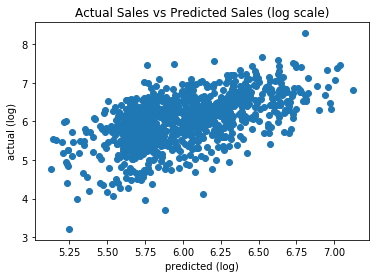

In [42]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted (log)')
plt.ylabel('actual (log)')
plt.title("Actual Sales vs Predicted Sales (log scale)")
plt.show()

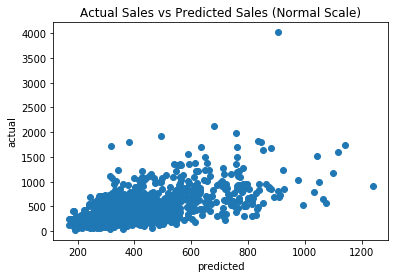

In [44]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(np.exp(gb_pred), np.exp(y_test))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Actual Sales vs Predicted Sales (Normal Scale)")
plt.show()

<br>
### Finally, let's save the winning model.

In [48]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, mi...rs=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False))])

- Taking the gradient boost model

In [52]:
#save the final gradient boosting regressor model

winning_model = fitted_models['gb'].best_estimator_.named_steps["gradientboostingregressor"]

In [53]:
winning_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False)

In [55]:
#Taking the feature importance

winning_model.feature_importances_

array([0.015, 0.   , 0.02 , 0.025, 0.   , 0.025, 0.01 , 0.005, 0.   ,
       0.   , 0.   , 0.   , 0.08 , 0.055, 0.   , 0.02 , 0.02 , 0.01 ,
       0.035, 0.015, 0.   , 0.005, 0.   , 0.015, 0.   , 0.005, 0.01 ,
       0.   , 0.01 , 0.   , 0.015, 0.   , 0.015, 0.01 , 0.   , 0.   ,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.01 , 0.   ,
       0.   , 0.   , 0.025, 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.13 , 0.   , 0.   , 0.   , 0.   ,
       0.125, 0.   , 0.   , 0.   , 0.01 , 0.005, 0.09 , 0.   , 0.005,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.015, 0.005,
       0.01 , 0.01 , 0.   , 0.   , 0.02 , 0.   , 0.   , 0.01 , 0.   ,
       0.03 , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.015,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.02 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.005, 0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [59]:
plt.style.use("seaborn")

In [76]:
plt.rcParams["figure.figsize"] = (10,8)

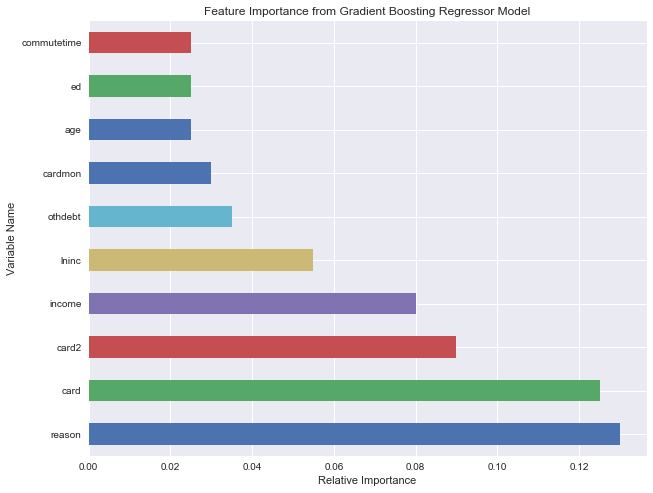

In [82]:
feat_importances = pd.Series(winning_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.title("Feature Importance from Gradient Boosting Regressor Model")
plt.xlabel("Relative Importance")
plt.ylabel("Variable Name")
plt.show()

### Key Factors driving the credit card spend

<big>
    1. Reason - Primary reason for being in the current bank
    2. Card - Type of primary credit card (Visa or Mastercard etc...)
    3. Card2 - Type of secondary credit card (Visa or Mastercard etc...)
    4. Income - Household income in thousands
    5. othdebt - Other debt in thousands
    6. Cardmon - Calling card last month

In [79]:
import pickle

Let's save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [81]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)